### Import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import PolynomialFeatures

### Data


In [ ]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=30, n_features=1)
y = np.array([[i] for i in y])

In [ ]:
mu= 0 # mean
sigma = 10 # standard deviation
s = np.random.normal(mu, sigma, 30)
s = np.array([[i] for i in s])
y = y + s

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

scaler = MinMaxScaler()
scaler.fit(y)
y = scaler.transform(y)

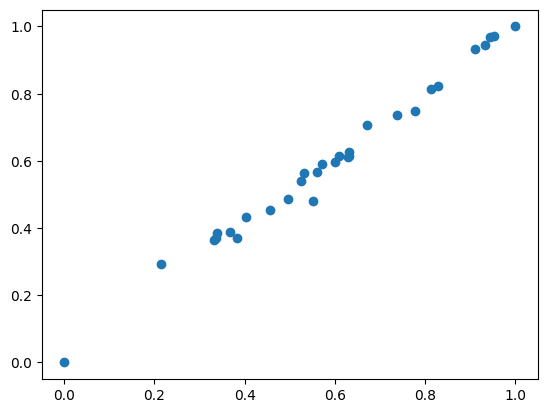

In [ ]:
plt.scatter(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_main, X_test_main, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### polynomial features to data


In [ ]:
# Create a high-degree polynomial model

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(15)
X_train = poly.fit_transform(X_train_main)
X_test = poly.fit_transform(X_test_main)

### utility function

In [ ]:
# Generate lots of points in order to plot the polynomial
xx = np.linspace(0,1,500)
qx = np.array([[i] for i in xx])
X_plot_pred = poly.fit_transform(qx)

### Linear Regression without Regularization:


In [ ]:


class LinearRegression:
    def __init__(self, learning_rate=0.1, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape


        self.weights = np.zeros(n_features)
        self.bias = 0


        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias


            dw = np.zeros(n_features)
            db = 0

            for i in range(n_samples):
                error = y_predicted[i] - y[i]
                for j in range(n_features):
                    dw[j] += (2 / n_samples) * error * X[i, j]
                db += (2 / n_samples) * error


            for j in range(n_features):
                self.weights[j] -= self.learning_rate * dw[j]
            self.bias -= self.learning_rate * db

    def predict(self, X):
      y_pred = np.dot(X, self.weights) + self.bias
      return y_pred.reshape(-1, 1)



In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

/tmp/ipython-input-472-3709735849.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dw[j] += (2 / n_samples) * error * X[i, j]


In [ ]:
qy = lin_reg.predict(X_plot_pred)

In [ ]:
# Filter so that the polynomial doesn't go off the graph.
qq = []
for i in qy:
    if i <= 1 and i >= 0:
        qq.append(i[0])
    else:
        qq.append(0)
qq = np.array(qq)

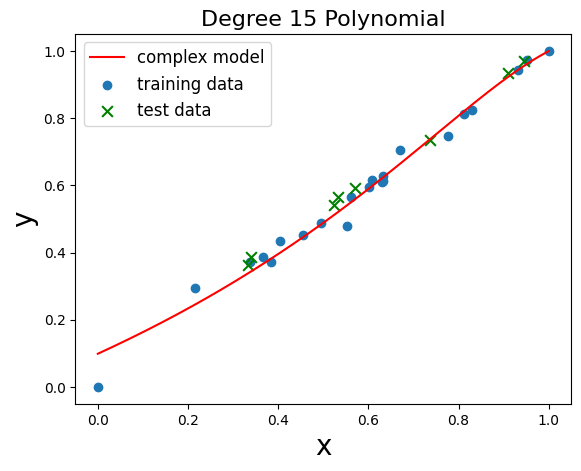

In [ ]:
## plot
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_ylabel('y', fontsize=20)
ax1.set_xlabel('x', fontsize=20)
ax1.set_title('Degree 15 Polynomial', fontsize=16)

plt.plot(xx, qq, color='red', label="complex model")
plt.scatter(X_train_main, y_train, label="training data")
plt.scatter(X_test_main, y_test, color="green", marker="x", label="test data", s=60)

plt.legend(prop={'size': 12})

### Regularization:

In [ ]:


class RidgeRegression:
    def __init__(self, alpha=0.1, learning_rate=0.01, n_iters=1000):
        self.alpha = alpha
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape


        self.weights = np.zeros(n_features)
        self.bias = 0


        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias


            dw = np.zeros(n_features)
            db = 0

            for i in range(n_samples):
                error = y_predicted[i] - y[i]
                for j in range(n_features):
                    dw[j] += (2 / n_samples) * error * X[i, j]
                db += (2 / n_samples) * error


            for j in range(n_features):
                dw[j] += 2 * self.alpha * self.weights[j]


            for j in range(n_features):
                self.weights[j] -= self.learning_rate * dw[j]
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


In [ ]:
ridge_regression = RidgeRegression(alpha=1)
ridge_regression.fit(X_train, y_train)

/tmp/ipython-input-477-1196147013.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dw[j] += (2 / n_samples) * error * X[i, j]


In [ ]:
qq_2 = ridge_regression.predict(X_plot_pred)

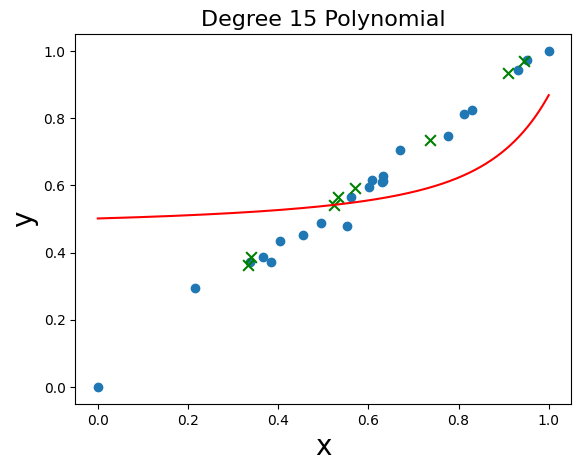

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_ylabel('y', fontsize=20)
ax1.set_xlabel('x', fontsize=20)
ax1.set_title('Degree 15 Polynomial', fontsize=16)

plt.plot(xx, qq_2, color='red', label="complex model")
plt.scatter(X_train_main, y_train, label="training data")
plt.scatter(X_test_main, y_test, color="green", marker="x", label="test data", s=60)